In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

x=pd.DataFrame(iris.data)
x.columns=['Sepal_length','Sepal_width','Petal_length','Petal_width']
y=pd.DataFrame(iris.target)
y.columns=['Targets']
print(y)

     Targets
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [ ]:
# Build K-means model
kmeans=KMeans(n_clusters=3,random_state=0)
clusters=kmeans.fit_predict(x,)

from scipy.stats import mode
labels = np.zeros_like(clusters)


for i in range(3):
    cat = (clusters == i)
    labels[cat] = mode(iris.target[cat])[0] 
    
acc = accuracy_score(iris.target, labels)
print('Accuracy = ', acc)


Accuracy =  0.8933333333333333


Accuracy using GMM =  0.9666666666666667


Text(0, 0.5, 'Petal Width')

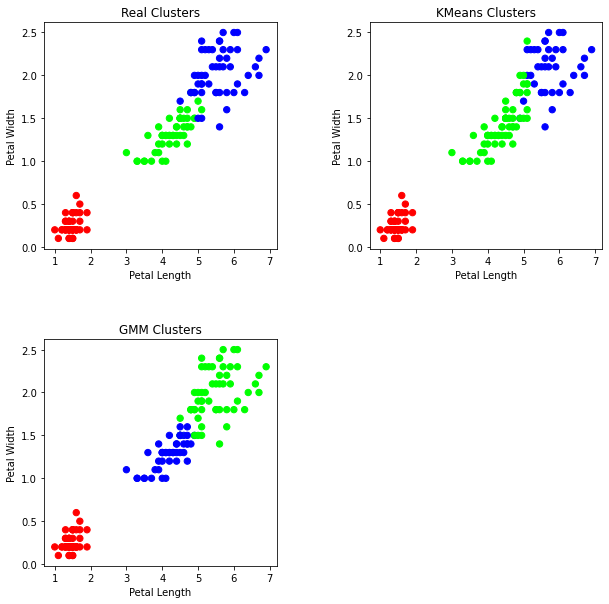

In [ ]:
plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'lime', 'blue'])

# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(x.Petal_length, x.Petal_width, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plot KMeans Model Classifications
plt.subplot(2, 2, 2)
plt.scatter(x.Petal_length, x.Petal_width, c = colormap[labels], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# General EM for GMM
from sklearn import preprocessing

# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

xs = pd.DataFrame(scaled_x, columns = x.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3,random_state=0)
gmm_y = gmm.fit_predict(xs)

labels = np.zeros_like(clusters)

for i in range(3):
    cat = (gmm_y == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 3)
plt.scatter(x.Petal_length, x.Petal_width, c = colormap[gmm_y], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
